![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/alpsina, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#ilk önce NAN olan verileri temizleyelim
#daha sonra uç verileri kaldıralım
#tensorflow yardımıyla bir model oluşturalım
#modelimizi eğitelim
#modelimize testlerimizi uygulayalım
#modelimiz iyi çalışıyor 
#ancak doğruluk payı değişim gösteriyor bunu random_state ve epochs parametreleri ile deneme yanılma yaparak çözebiliriz

In [34]:
#lets start 
df=pd.read_csv("dataset.csv")#read csv file


In [35]:
df


,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,NaN,3.562990,NaN,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


<AxesSubplot:>

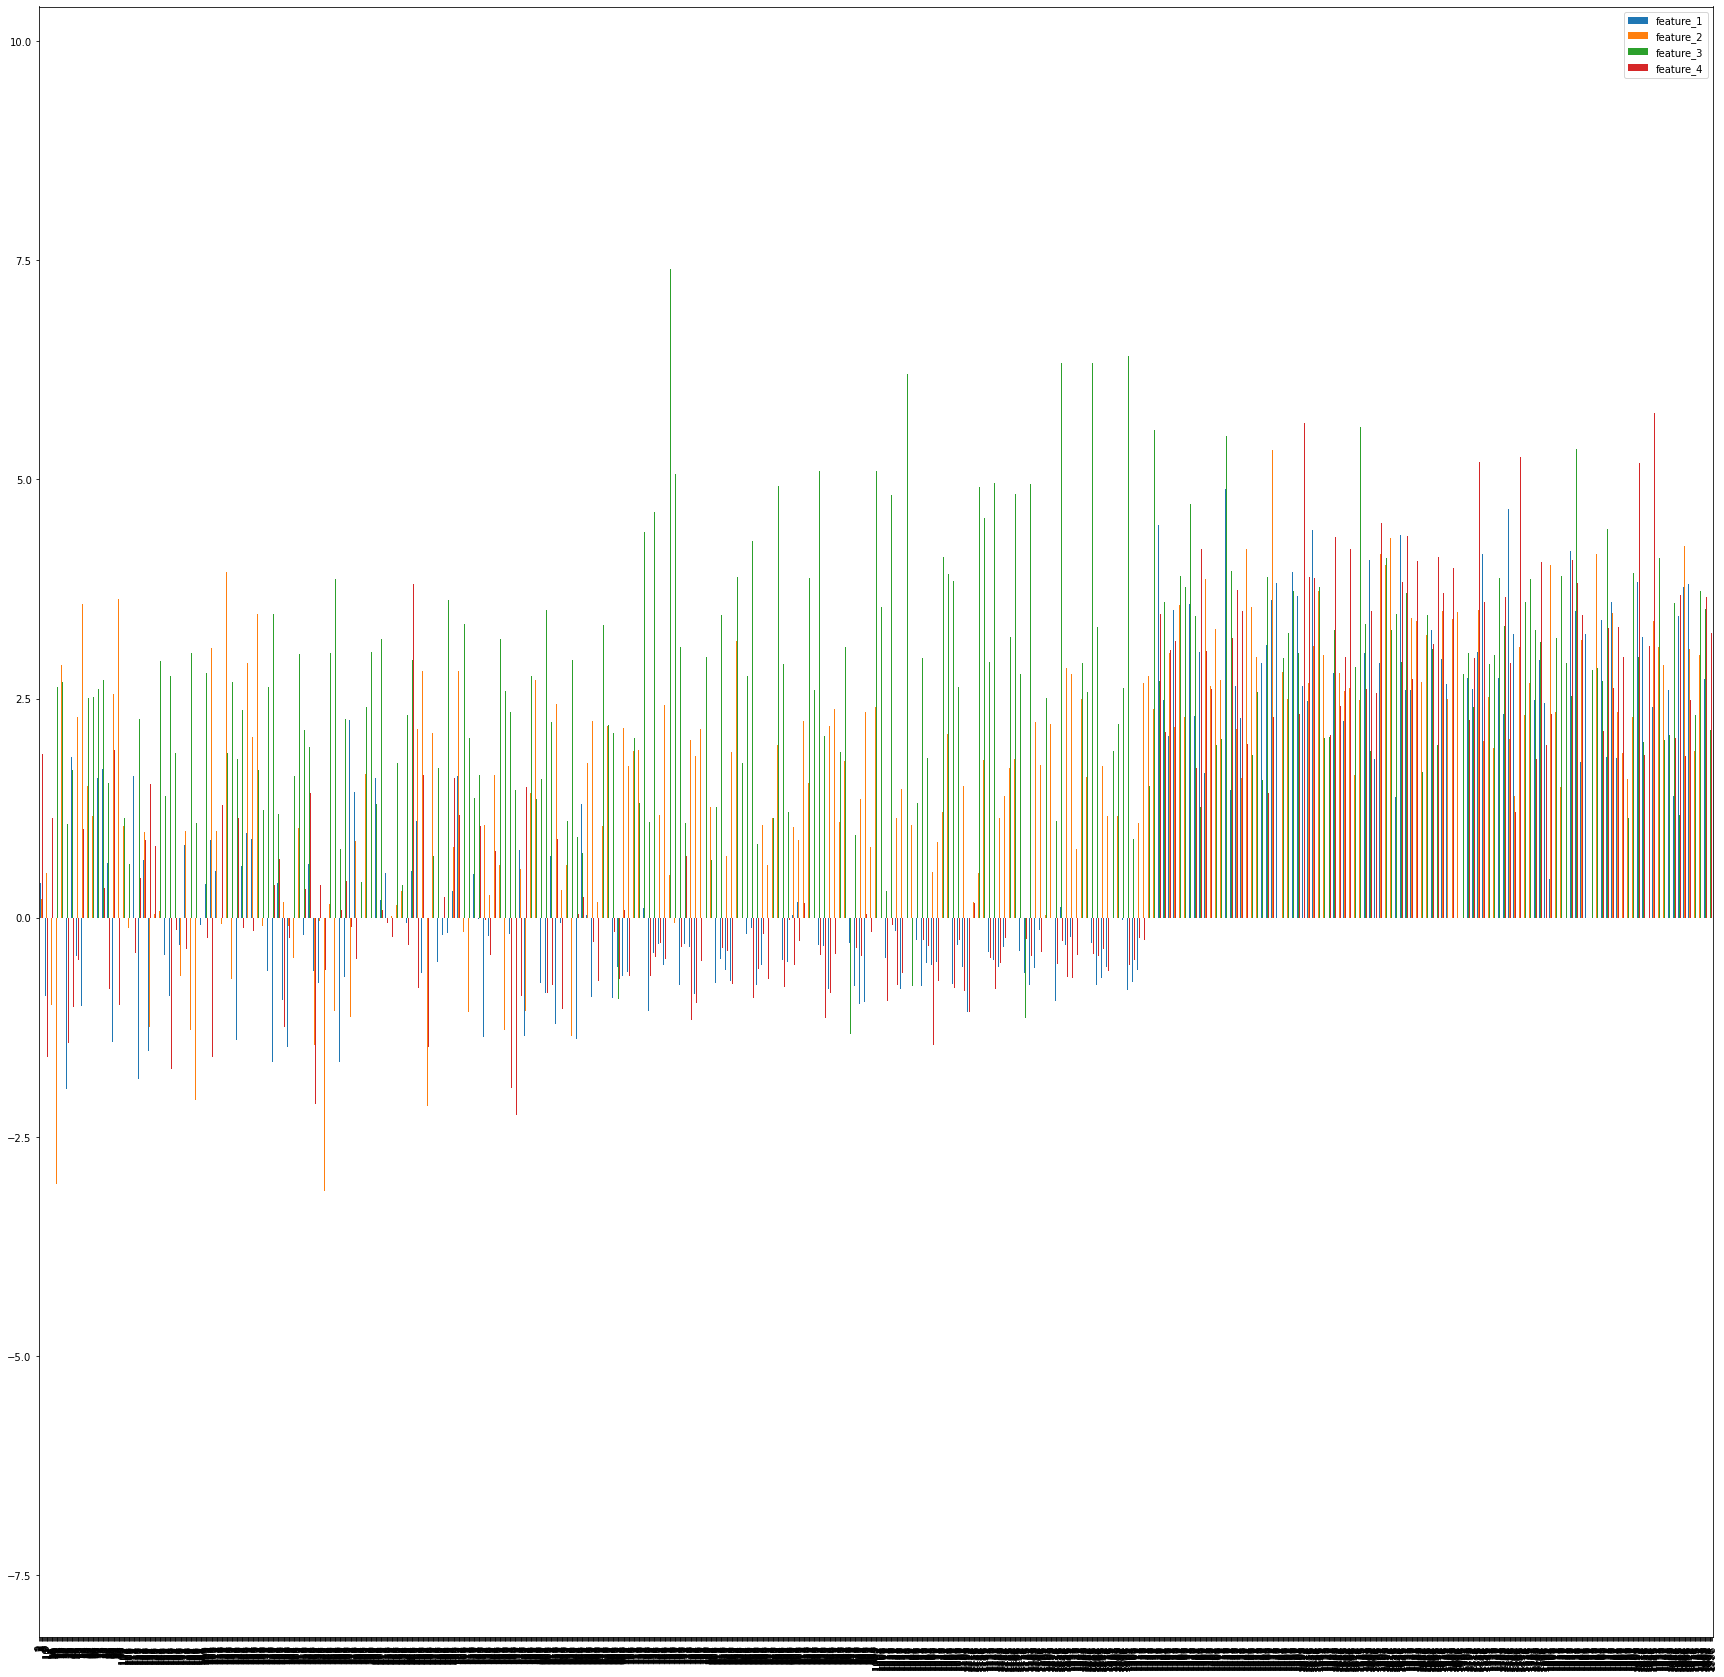

In [36]:
df.plot(y=["feature_1","feature_2","feature_3","feature_4"],kind='bar',figsize=(30,30))

In [37]:
df.isnull().sum()

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [38]:
df.isnull().sum().sum()

410

In [39]:
temp=dict(df.median(skipna=True))

In [40]:
type(temp)

dict

In [41]:
temp

{'feature_1': 0.0847885376329906,
 'feature_2': 1.8819044555183804,
 'feature_3': 2.4996226786329894,
 'feature_4': 0.0218573582198713,
 'isVirus': 0.0}

In [42]:

temp2=dict(df.min(skipna=True))

In [43]:
temp2

{'feature_1': -2.285499448789645,
 'feature_2': -7.363119269150507,
 'feature_3': -5.363119269150507,
 'feature_4': -3.0064987150073263,
 'isVirus': False}

In [44]:
temp3=dict(df.max(skipna=True))

In [45]:
temp3

{'feature_1': 5.929096241763862,
 'feature_2': 7.549658309223153,
 'feature_3': 9.549658309223153,
 'feature_4': 5.759355114021583,
 'isVirus': True}

In [46]:
df.info

<bound method DataFrame.info of       feature_1  feature_2  feature_3  feature_4  isVirus
0     -0.233467   0.308799   2.484015   1.732721    False
1      1.519003   1.238482   3.344450   0.783744    False
2      0.400640   1.916748   3.291096  -0.918519    False
3     -1.616474   0.209703   1.461544  -0.291837    False
4      1.480515   5.299829   2.640670   1.867559     True
...         ...        ...        ...        ...      ...
1994   2.532559   2.139847   3.859104   2.190373    False
1995        NaN   3.562990        NaN   2.499590    False
1996   4.059027   1.977436   2.144760   4.257220    False
1997   3.457310   3.962342   3.770837   3.243168    False
1998   3.578521   3.349654        NaN   1.562209    False

[1999 rows x 5 columns]>

In [47]:
df=df.dropna()

In [48]:
df.info

<bound method DataFrame.info of       feature_1  feature_2  feature_3  feature_4  isVirus
0     -0.233467   0.308799   2.484015   1.732721    False
1      1.519003   1.238482   3.344450   0.783744    False
2      0.400640   1.916748   3.291096  -0.918519    False
3     -1.616474   0.209703   1.461544  -0.291837    False
4      1.480515   5.299829   2.640670   1.867559     True
...         ...        ...        ...        ...      ...
1991   5.153120   3.468305   3.112738   3.657268    False
1993   2.932724   1.681604   2.629296   2.054384    False
1994   2.532559   2.139847   3.859104   2.190373    False
1996   4.059027   1.977436   2.144760   4.257220    False
1997   3.457310   3.962342   3.770837   3.243168    False

[1622 rows x 5 columns]>

In [49]:
Q3=dict()

In [50]:
for q in temp3.keys():
    Q3[q]=temp3[q]-temp[q]

In [51]:
Q3

{'feature_1': 5.8443077041308715,
 'feature_2': 5.667753853704772,
 'feature_3': 7.0500356305901635,
 'feature_4': 5.737497755801711,
 'isVirus': 1.0}

In [52]:
Q1=dict()

In [53]:
for p in temp2.keys():
    Q1[p]=temp[p]-temp2[p]

In [54]:
Q1

{'feature_1': 2.370287986422636,
 'feature_2': 9.245023724668888,
 'feature_3': 7.862741947783497,
 'feature_4': 3.0283560732271977,
 'isVirus': 0.0}

In [55]:
IQR=dict()

In [56]:
for z in Q1.keys():
    IQR[z]=Q3[z]-Q1[z]
    

In [57]:
IQR


{'feature_1': 3.4740197177082357,
 'feature_2': -3.577269870964116,
 'feature_3': -0.8127063171933333,
 'feature_4': 2.7091416825745136,
 'isVirus': 1.0}

In [58]:
x=0
for i in Q1.keys():
    if i=="isVirus":
        break
    x=df[(df[i]<(Q1[i]-1.5*IQR[i])) | (df[i]>(Q3[i]+(1.5*IQR[i])))]

In [59]:
x

,feature_1,feature_2,feature_3,feature_4,isVirus
10,-0.686102,1.457546,2.024176,-1.592211,True
12,0.864052,-4.298557,2.283903,-2.239604,True
14,-0.860510,1.236653,1.786827,-1.631220,True
18,0.003222,-2.558586,1.606859,-1.057474,True
22,0.849115,4.522493,2.628189,-1.228895,True
...,...,...,...,...,...
1226,-0.306167,1.163258,4.323142,-1.041581,False
1244,-0.268650,0.551271,3.692518,-1.229524,False
1249,-0.055584,2.859289,-0.181466,-1.168839,True
1261,-0.379012,2.016318,-0.792665,-1.087388,True


In [60]:
x.index

Int64Index([  10,   12,   14,   18,   22,   29,   31,   34,   45,   46,
            ...
            1091, 1111, 1178, 1196, 1213, 1226, 1244, 1249, 1261, 1315],
           dtype='int64', length=107)

In [61]:
new_df=df.drop(x.index)

In [62]:
new_df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1991,5.153120,3.468305,3.112738,3.657268,False
1993,2.932724,1.681604,2.629296,2.054384,False
1994,2.532559,2.139847,3.859104,2.190373,False
1996,4.059027,1.977436,2.144760,4.257220,False


<AxesSubplot:>

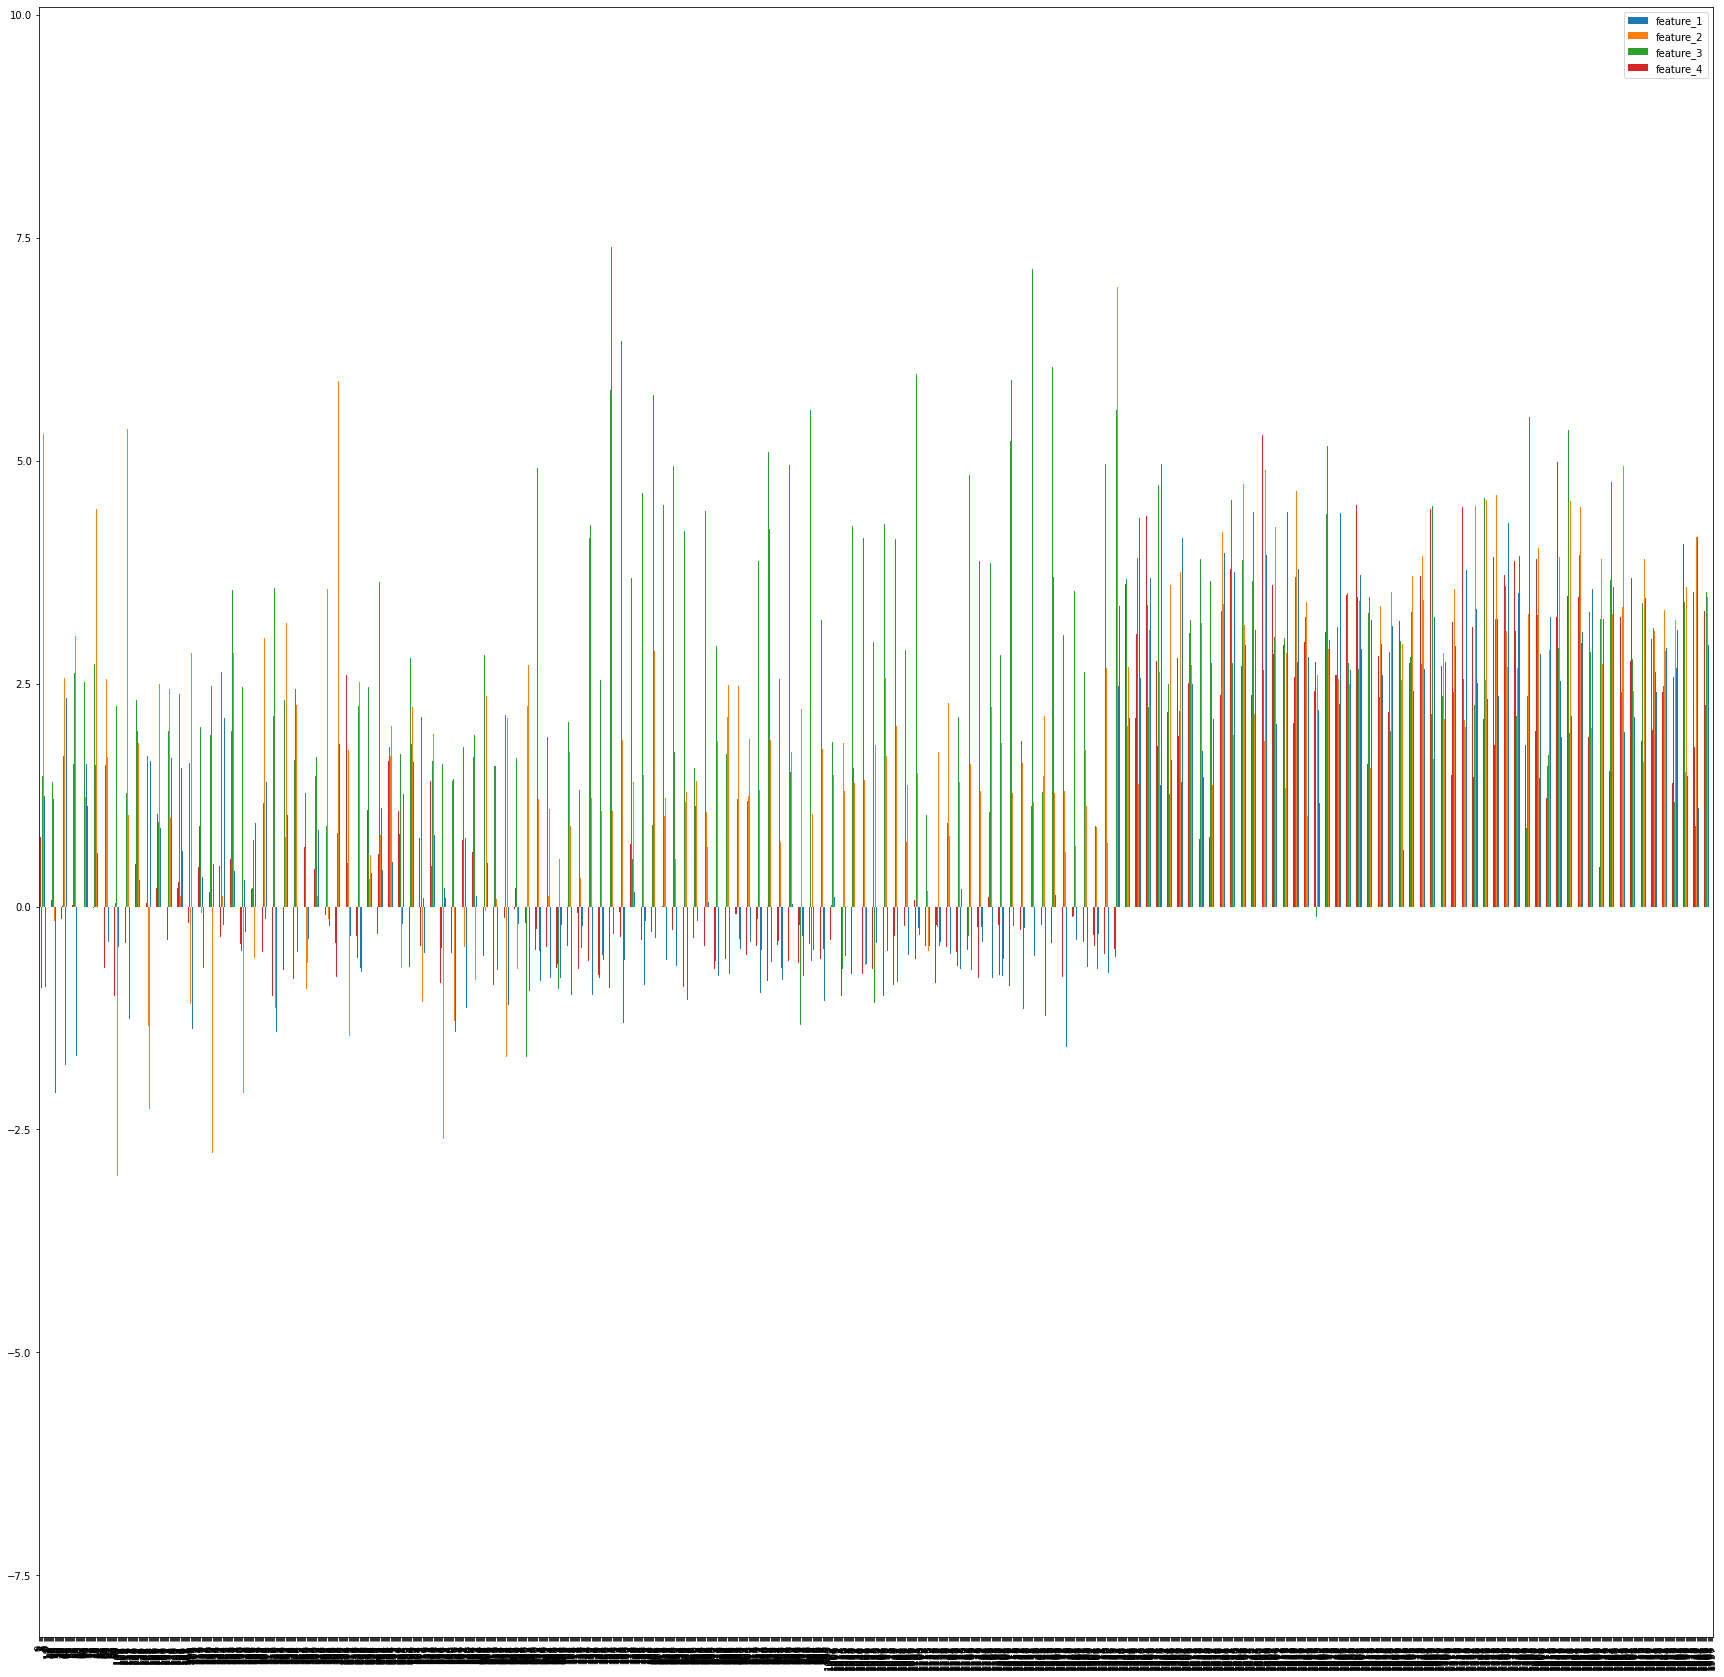

In [63]:
new_df.plot(y=["feature_1","feature_2","feature_3","feature_4"],kind='bar',figsize=(30,30))

In [67]:
new_df.isVirus=new_df.isVirus.replace({True:1,False:0})
print(new_df.isVirus)
        

0       0
1       0
2       0
3       0
4       1
       ..
1991    0
1993    0
1994    0
1996    0
1997    0
Name: isVirus, Length: 1515, dtype: int64


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
y=new_df["isVirus"]
x=new_df.drop("isVirus",axis=1).values

In [71]:
x

array([[-0.23346666,  0.30879909,  2.48401537,  1.73272119],
       [ 1.51900328,  1.23848178,  3.34445044,  0.78374449],
       [ 0.40064037,  1.91674842,  3.2910962 , -0.91851908],
       ...,
       [ 2.53255899,  2.13984662,  3.85910419,  2.19037342],
       [ 4.05902725,  1.97743561,  2.14475954,  4.25721965],
       [ 3.45730965,  3.96234174,  3.77083696,  3.24316822]])

In [72]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1991    0
1993    0
1994    0
1996    0
1997    0
Name: isVirus, Length: 1515, dtype: int64

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler=MinMaxScaler()

In [76]:
scaler.fit(x_train)

MinMaxScaler()

In [77]:
x_train=scaler.transform(x_train)

In [78]:
x_test=scaler.transform(x_test)

In [80]:
x_train.shape

(1060, 4)

In [81]:
model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [83]:
earlyStopping= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
34/34 [==============================] - 1s 4ms/step - loss: 0.7068 - val_loss: 0.6529
Epoch 2/700
34/34 [==============================] - 0s 2ms/step - loss: 0.6734 - val_loss: 0.6339
Epoch 3/700
34/34 [==============================] - 0s 1ms/step - loss: 0.6598 - val_loss: 0.6208
Epoch 4/700
34/34 [==============================] - 0s 1ms/step - loss: 0.6452 - val_loss: 0.6081
Epoch 5/700
34/34 [==============================] - 0s 1ms/step - loss: 0.6400 - val_loss: 0.5979
Epoch 6/700
34/34 [==============================] - 0s 2ms/step - loss: 0.6369 - val_loss: 0.5887
Epoch 7/700
34/34 [==============================] - 0s 2ms/step - loss: 0.6311 - val_loss: 0.5835
Epoch 8/700
34/34 [==============================] - 0s 2ms/step - loss: 0.6150 - val_loss: 0.5692
Epoch 9/700
34/34 [==============================] - 0s 2ms/step - loss: 0.6065 - val_loss: 0.5590
Epoch 10/700
34/34 [==============================] - 0s 2ms/step - loss: 0.5986 - val_loss: 0.5423
Epoch 11/

In [84]:
kayipDataFrame=pd.DataFrame(model.history.history)

<AxesSubplot:>

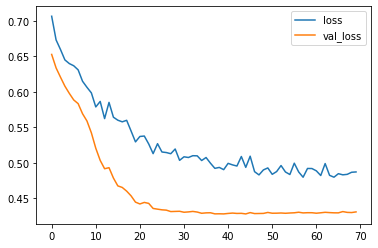

In [85]:
kayipDataFrame.plot()

In [86]:
tahminlerimiz=(model.predict(x_test)>0.5).astype("int32")

15/15 [==============================] - 0s 784us/step


In [87]:
tahminlerimiz

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(y_test,tahminlerimiz))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       323
           1       0.00      0.00      0.00       132

    accuracy                           0.71       455
   macro avg       0.35      0.50      0.42       455
weighted avg       0.50      0.71      0.59       455



C:\Users\slymn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\slymn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\slymn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [90]:
print(confusion_matrix(y_test,tahminlerimiz))

[[323   0]
 [132   0]]
